Supervised Machine Learning Model 

In [131]:
#Import packages 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import metrics
import numpy as np 

Import Data 

In [132]:
Spawns = pd.read_csv("../Data/pokemon-spawns.csv")
Spawns

,s2_id,s2_token,num,name,lat,lng,encounter_ms,disppear_ms
0,-9.182900e+18,808fca40de3,1,Bulbasaur,37.352721,-121.965752,1.469520e+12,1.469520e+12
1,-9.182930e+18,808fb000163,1,Bulbasaur,37.386986,-122.173674,-1.000000e+00,1.469520e+12
2,-9.182910e+18,808fbfb5ca1,1,Bulbasaur,37.562587,-122.033979,1.469520e+12,1.469520e+12
3,-9.182960e+18,808f95fd6c5,1,Bulbasaur,37.577153,-122.082546,1.469520e+12,1.469520e+12
4,-9.182980e+18,808f7c2eb87,1,Bulbasaur,37.717652,-122.453226,1.469520e+12,1.469520e+12
...,...,...,...,...,...,...,...,...
314100,-9.185790e+18,8085845142b,148,Dragonair,37.860065,-122.485598,1.469560e+12,1.469560e+12
314101,-9.185790e+18,808580e0793,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12
314102,-9.185790e+18,808580e0793,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12
314103,-9.185790e+18,808580e0793,148,Dragonair,37.806800,-122.423853,1.469570e+12,1.469570e+12


Data Wrangling 

In [133]:
#Check Data types
Spawns.dtypes

s2_id           float64
s2_token         object
num               int64
name             object
lat             float64
lng             float64
encounter_ms    float64
disppear_ms     float64
dtype: object

In [134]:
#Change floats to integers 
Spawns.s2_id = Spawns.s2_id.astype(int)
Spawns.lat = Spawns.lat.astype(int)
Spawns.lng = Spawns.lng.astype(int)
Spawns.encounter_ms = Spawns.encounter_ms.astype(int)
Spawns.disppear_ms = Spawns.disppear_ms.astype(int)

In [135]:
SpawnsCut= Spawns.drop(['name','s2_id', 's2_token', 'disppear_ms' ], axis=1)

In [136]:
x = SpawnsCut[[ 'encounter_ms', 'lng', 'lat']]
y = SpawnsCut['num']

Train Test Split

In [137]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4, random_state=101)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(188463, 3) (188463,)
(125642, 3) (125642,)


The x_train datasets, the 188463 rows and 3 columns/ The x_test datasets, the 125642 rows and 3 columns

Create Linear Regression Model 

In [138]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

Interpreting Supervised Machine Learning Model Accuracy 

In [139]:
predictions = lm.predict(x_test)
predictions

array([45.22457734, 45.22457734, 45.2623491 , ..., 45.22457734,
       45.22457734, 45.2981609 ])

Plot It

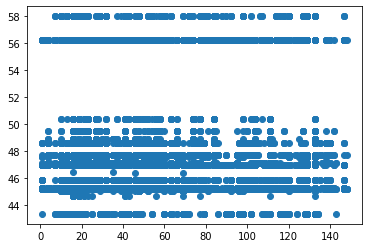

In [140]:
plt.scatter(y_test, predictions)

Accuracy Score 

In [141]:
print("Score:", lm.score(x_test, y_test))

Score: 0.008422382415490981


Mean Absolute Error 

In [142]:
metrics.mean_absolute_error(y_test, predictions)

28.477656921230302

Mean Squared Error 

In [143]:
metrics.mean_squared_error(y_test, predictions)

1297.480155142306

Rooted Mean Squared Error 

In [144]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

36.02055184394467

K-Fold Cross Validation 

In [145]:
#Import Packages 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [146]:
kfold =KFold()
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [ 62821  62822  62823 ... 314102 314103 314104], test: [    0     1     2 ... 62818 62819 62820]
train: [     0      1      2 ... 314102 314103 314104], test: [ 62821  62822  62823 ... 125639 125640 125641]
train: [     0      1      2 ... 314102 314103 314104], test: [125642 125643 125644 ... 188460 188461 188462]
train: [     0      1      2 ... 314102 314103 314104], test: [188463 188464 188465 ... 251281 251282 251283]
train: [     0      1      2 ... 251281 251282 251283], test: [251284 251285 251286 ... 314102 314103 314104]


In [147]:
print(cross_val_score(lm, x,y, cv=3))

[-173.421079     -3.80386592   -4.8324782 ]


Decision Trees 

In [148]:
import seaborn as sns 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [149]:
x = SpawnsCut[[ 'encounter_ms', 'lng', 'lat']]
y = SpawnsCut['num']

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .3, random_state=76)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(219873, 3) (219873,)
(94232, 3) (94232,)


In [151]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

Assess The Model

In [152]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


The Square matrix: Actual values 87873, 10 / Predicted values 6339, 10

In [153]:
print(classification_report (y_test, treePredictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       695
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00       156
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00        22
          10       0.00      0.00      0.00      2186
          11       0.00      0.00      0.00       134
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00      4069
          14       0.00      0.00      0.00       241
          15       0.00      0.00      0.00        38
          16       0.16      0.37      0.22     13173
          17       0.00      0.00      0.00       842
          18       0.00      0.00      0.00       101
          19       0.12    

C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


From the results the model has very little precision 

RANDOM FOREST 

In [154]:
#Import Packages 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [155]:
#subset data
x = SpawnsCut.drop('num', axis=1)
y = SpawnsCut['num']

Train Test Split 

In [156]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

Initial Random Forest Model 

In [157]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

Evaluate Model Fit

In [158]:
forestPredictions = forest.predict(x_test)

In [159]:
print(confusion_matrix(y_test, forestPredictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [160]:
print(classification_report(y_test, forestPredictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       695
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00       156
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00        22
          10       0.00      0.00      0.00      2186
          11       0.00      0.00      0.00       134
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00      4069
          14       0.00      0.00      0.00       241
          15       0.00      0.00      0.00        38
          16       0.16      0.37      0.22     13173
          17       0.00      0.00      0.00       842
          18       0.00      0.00      0.00       101
          19       0.12    

C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Little to no precision

Hyperparameter Tuning 

In [161]:
#import packages 
from sklearn.model_selection import RandomizedSearchCV 

Number of Estimators 

In [162]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)
    

1 : 0.1465213515578572
4 : 0.14648951523898462
5 : 0.1464258426012395
8 : 0.1464258426012395
10 : 0.1464258426012395
20 : 0.14621360047542237
50 : 0.14621360047542237
75 : 0.14650012734527548
100 : 0.14650012734527548
250 : 0.14650012734527548
500 : 0.14650012734527548


Very low accuracy

Tuning the remaining tree

In [163]:
# Number of features to consider at every split
max_features = ['auto', None, 'log2']
# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, None]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'max_features': ['auto', None, 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, None], 'min_samples_leaf': [1, 2, 4]}


In [164]:
rf = RandomForestClassifier(n_estimators=10)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 90, cv = 3, random_state=42)

Fit the model 

In [165]:
rf_random.fit(x_train, y_train)

C:\Python3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Python3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be remo

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=90,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, None],
                                        'max_features': ['auto', None, 'log2'],
                                        'min_samples_leaf': [1, 2, 4]},
                   random_state=42)

Which parameter is helpful?

In [166]:
rf_random.best_params_

{'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60}

The model with the best accuracy has atleast 1 sample per leaf, leave the max features setting on 'log2', has a maximum depth of 50 decision points

Run 1 last random forest that has those parameters 

In [167]:
forest = RandomForestClassifier(n_estimators=10, min_samples_leaf=1, max_features="log2", max_depth=50)
forest.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features='log2', n_estimators=10)

The same prediction and classification report info as before with the new and improved model

In [168]:
forestPredictions = forest.predict(x_test)

In [169]:
print(confusion_matrix(y_test, forestPredictions))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [170]:
print(classification_report(y_test, forestPredictions))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       695
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00       156
           5       0.00      0.00      0.00         6
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00       245
           8       0.00      0.00      0.00        22
          10       0.00      0.00      0.00      2186
          11       0.00      0.00      0.00       134
          12       0.00      0.00      0.00        16
          13       0.00      0.00      0.00      4069
          14       0.00      0.00      0.00       241
          15       0.00      0.00      0.00        38
          16       0.16      0.37      0.22     13173
          17       0.00      0.00      0.00       842
          18       0.00      0.00      0.00       101
          19       0.12    

C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Still not much improvement 

Feature Importance 

In [171]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

lat             0.351147
lng             0.640338
encounter_ms    0.008515
dtype: float64

In [172]:
#Put them in order 
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

lng             0.640338
lat             0.351147
encounter_ms    0.008515
dtype: float64


<AxesSubplot:>

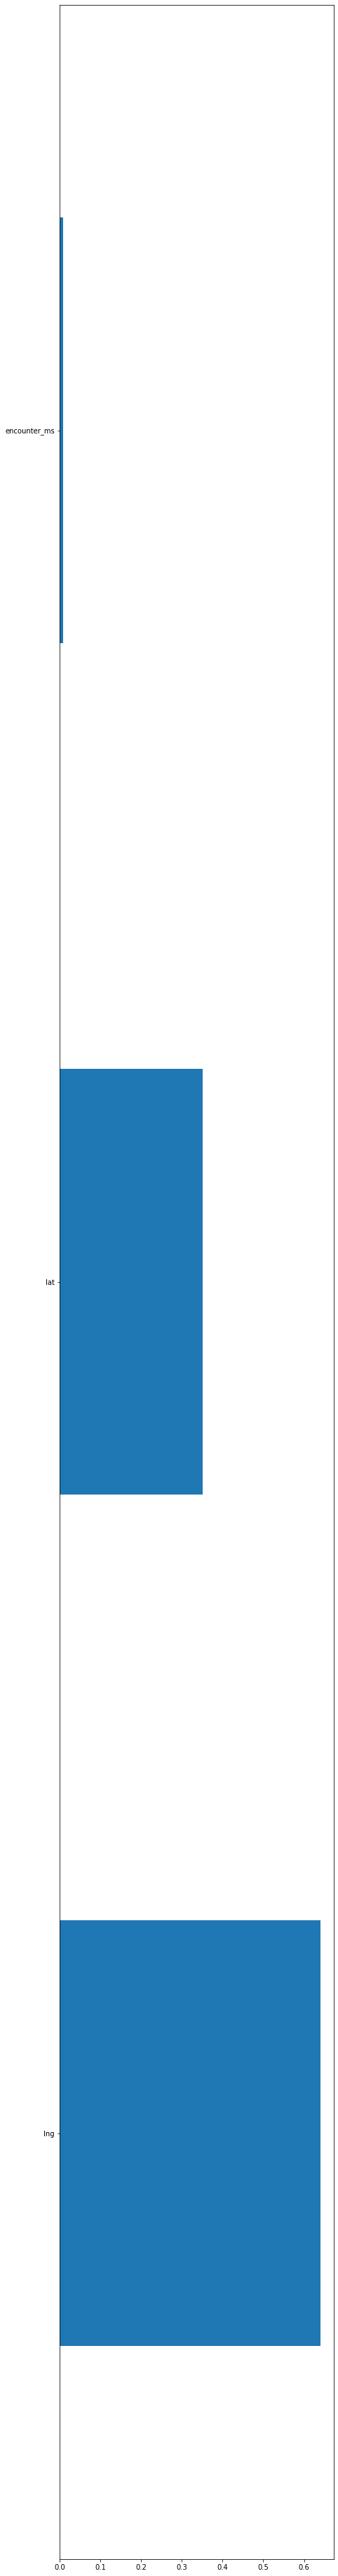

In [173]:
#Bar graph
feature_importances.plot(kind='barh', figsize=(7, 67))